In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All columns are numerical. so, no need to use label encoder

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in any column

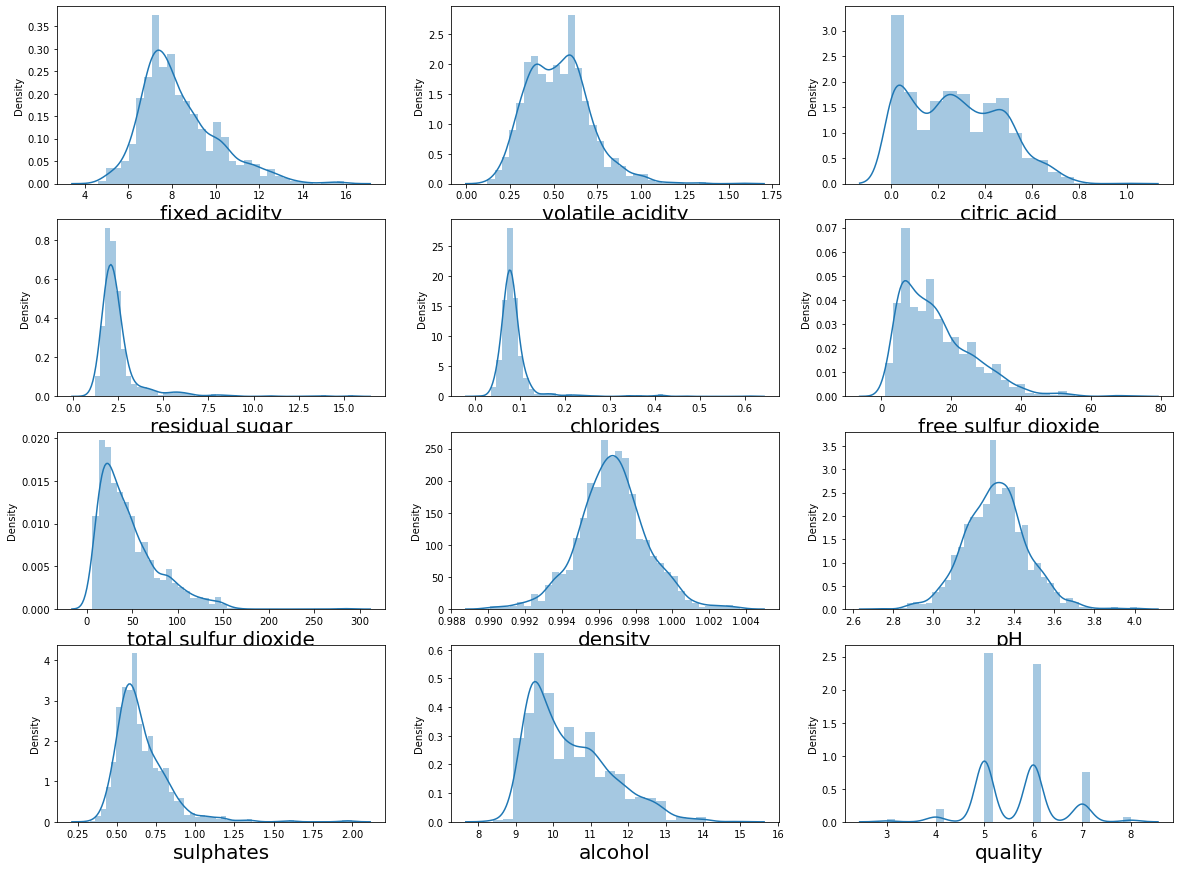

In [9]:
plt.figure(figsize = (20,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
       ax = plt.subplot(4,3, plotnumber)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize =20)
    
    plotnumber+=1
    
plt.show()

Skewness should be removed.So applying log transformation technique.

In [10]:
df['density'] = np.log(1 + df['density'])

In [11]:
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

In [12]:
df['alcohol'] = np.log(1 + df['alcohol'])

In [13]:
df['pH'] = np.log(1 + df['pH'])

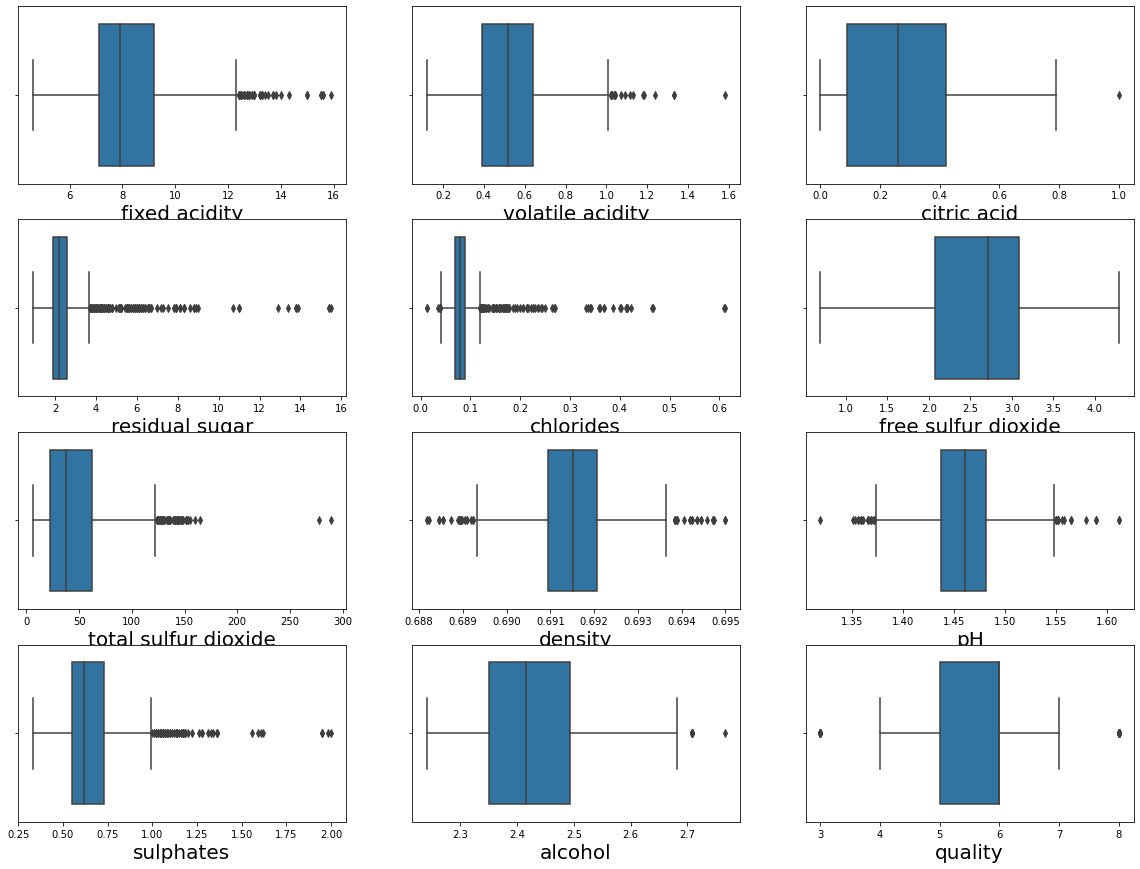

In [15]:
plt.figure(figsize = (20,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
       ax = plt.subplot(4,3, plotnumber)
       sns.boxplot(df[column])
       plt.xlabel(column, fontsize =20)
    
    plotnumber+=1
    
plt.show()

Outliers should be treated.Using Z-score for the same

In [16]:
from scipy.stats import zscore

In [17]:
y = df['quality']
x = df.drop(columns = ['quality'])

In [18]:
z = np.abs(zscore(x))
threshold = 3
df_new = x[(z<3).all(axis=1)]

In [19]:
print("shape before and after")
print("shape before".ljust(20),":", x.shape)
print("shape after".ljust(20),":", df_new.shape)
print("percentage loss".ljust(20),":", (x.shape[0]-df_new.shape[0])/x.shape[0])

shape before and after
shape before         : (1599, 11)
shape after          : (1470, 11)
percentage loss      : 0.08067542213883677


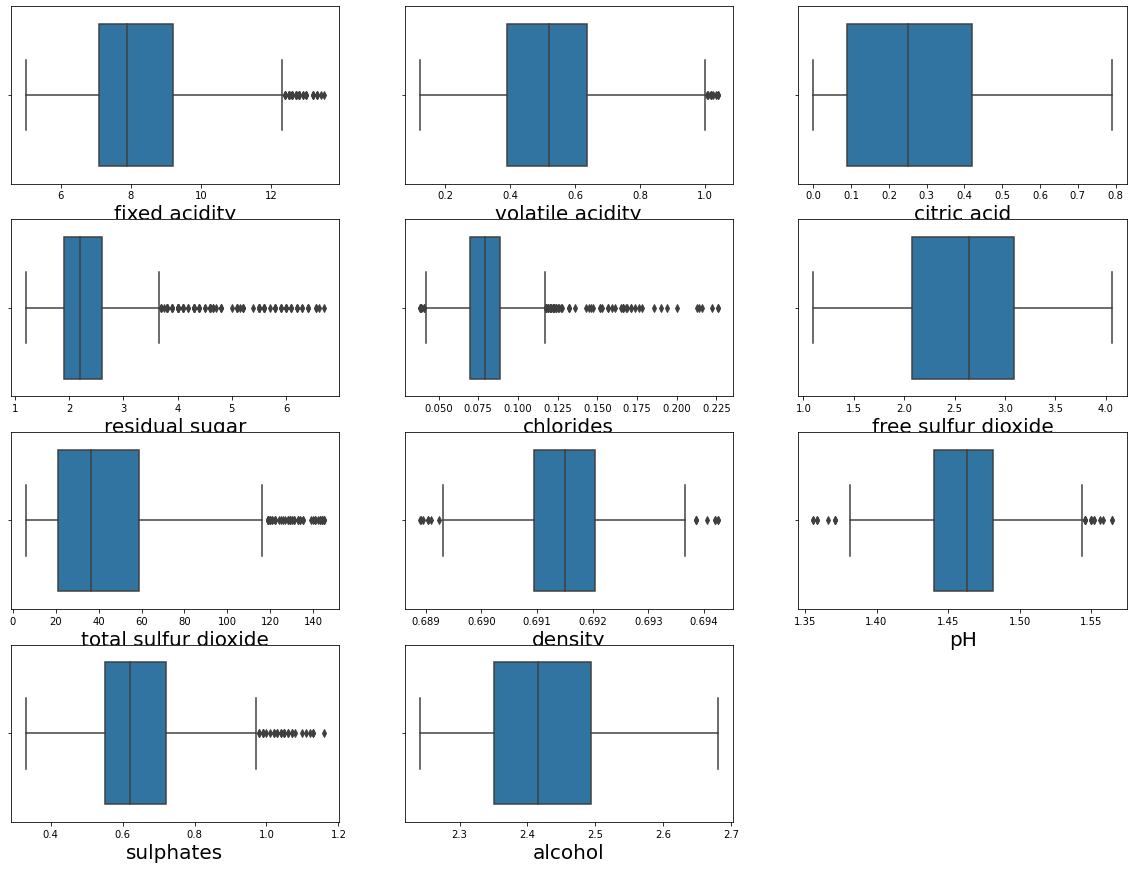

In [20]:
plt.figure(figsize = (20,15), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=12:
       ax = plt.subplot(4,3, plotnumber)
       sns.boxplot(df_new[column])
       plt.xlabel(column, fontsize =20)
    
    plotnumber+=1
    
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

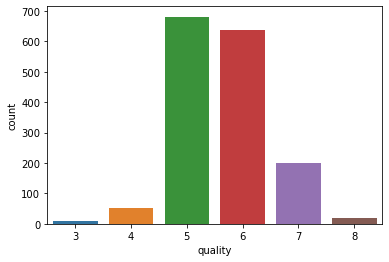

In [21]:
sns.countplot(df['quality'])

There is class imbalance. so needs to be balanced

<AxesSubplot:>

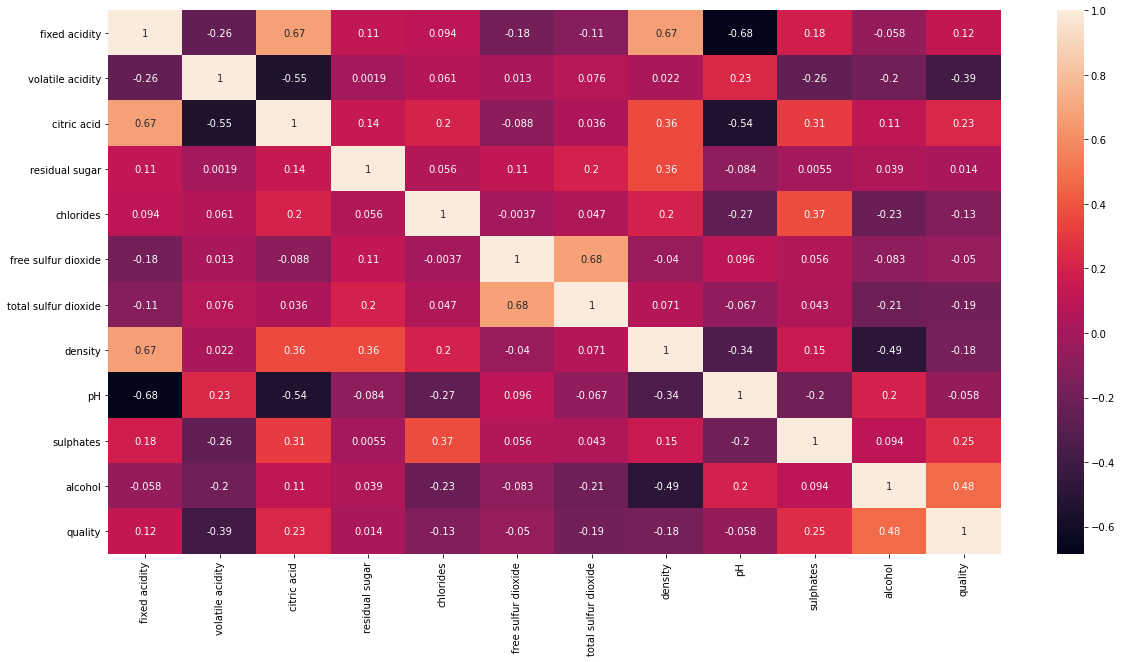

In [24]:
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

In [ ]:
Alcohol is most posetively correlated.

In [25]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [27]:
y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import Decision

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [55]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.6291585127201565 on Random_state 162


The best random state found is 162. I will create my model using random state-162

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = maxRS)

In [57]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.6291585127201565
[[154  25   1   2   0   0]
 [ 18  93  33  22   1   2]
 [ 12  26  87  19  11   2]
 [  3  14  34  74  32  17]
 [  0   1   3  32  99  37]
 [  0   0   0   0  32 136]]
              precision    recall  f1-score   support

           3       0.82      0.85      0.83       182
           4       0.58      0.55      0.57       169
           5       0.55      0.55      0.55       157
           6       0.50      0.43      0.46       174
           7       0.57      0.58      0.57       172
           8       0.70      0.81      0.75       168

    accuracy                           0.63      1022
   macro avg       0.62      0.63      0.62      1022
weighted avg       0.62      0.63      0.62      1022



In [59]:
from sklearn.tree import DecisionTreeClassifier

DT = LogisticRegression()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6291585127201565
[[154  25   1   2   0   0]
 [ 18  93  33  22   1   2]
 [ 12  26  87  19  11   2]
 [  3  14  34  74  32  17]
 [  0   1   3  32  99  37]
 [  0   0   0   0  32 136]]
              precision    recall  f1-score   support

           3       0.82      0.85      0.83       182
           4       0.58      0.55      0.57       169
           5       0.55      0.55      0.55       157
           6       0.50      0.43      0.46       174
           7       0.57      0.58      0.57       172
           8       0.70      0.81      0.75       168

    accuracy                           0.63      1022
   macro avg       0.62      0.63      0.62      1022
weighted avg       0.62      0.63      0.62      1022



In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8816046966731899
[[181   1   0   0   0   0]
 [  3 158   5   3   0   0]
 [  0   5 120  28   4   0]
 [  1   4  24 120  20   5]
 [  0   0   2  12 157   1]
 [  0   0   0   0   3 165]]
              precision    recall  f1-score   support

           3       0.98      0.99      0.99       182
           4       0.94      0.93      0.94       169
           5       0.79      0.76      0.78       157
           6       0.74      0.69      0.71       174
           7       0.85      0.91      0.88       172
           8       0.96      0.98      0.97       168

    accuracy                           0.88      1022
   macro avg       0.88      0.88      0.88      1022
weighted avg       0.88      0.88      0.88      1022



In [62]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8816046966731899
[[181   1   0   0   0   0]
 [  3 158   5   3   0   0]
 [  0   5 120  28   4   0]
 [  1   4  24 120  20   5]
 [  0   0   2  12 157   1]
 [  0   0   0   0   3 165]]
              precision    recall  f1-score   support

           3       0.98      0.99      0.99       182
           4       0.94      0.93      0.94       169
           5       0.79      0.76      0.78       157
           6       0.74      0.69      0.71       174
           7       0.85      0.91      0.88       172
           8       0.96      0.98      0.97       168

    accuracy                           0.88      1022
   macro avg       0.88      0.88      0.88      1022
weighted avg       0.88      0.88      0.88      1022



In [64]:
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.42828913701208726


In [65]:
rwr=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

Cross validation score of DecisionTree model : 0.42828913701208726


In [66]:
rwr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

Cross validation score of RandomForest model : 0.8044545462707202


In [67]:
rwr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of SVC model : 0.42828913701208726


The least difference in accuracy and cv score is for RandomForestClassifier. So, we found our best model

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [77]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [80]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [81]:
model=RandomForestClassifier(criterion= 'entropy',
 max_depth= 8,
 max_features= 'sqrt',
 n_estimators= 200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.09393346379647


In [82]:
import joblib
joblib.dump(model,"WineModel.pkl")

['WineModel.pkl']